# Window Functions

In [74]:
# Copyright (C) 2020 Danny Schneider
##
## This program is free software; you can redistribute it and/or
## modify it under the terms of the GNU General Public
## License as published by the Free Software Foundation;
## either version 2, or (at your option) any later version.
##
## Octave is distributed in the hope that it will be useful,
## but WITHOUT ANY WARRANTY; without even the implied
## warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR
## PURPOSE.  See the GNU General Public License for more
## details.
##
## You should have received a copy of the GNU General Public
## License along with Octave; see the file COPYING.  If not,
## write to the Free Software Foundation, 59 Temple Place -
## Suite 330, Boston, MA 02111-1307, USA.

In [75]:
nos=128;
XN=512;
n=0:1:nos-1;

<div class="pagebreak"></div>

## Window Function Definitions

In [76]:
#Rectangular
w_rec=ones(1,nos);
#Hanning
w_hann=0.5.*(1.-cos(2.*pi.*n./(nos.-1)));
#Hamming
w_hamming=0.54.-0.46.*cos(2.*pi.*n./(nos.-1));
#Bartlett / triangular window
w_bartlett=2./nos.*(nos./2.-abs(n.-(nos.-1)./2));
#Blackman
alpha=0.16;a0=(1.-alpha)./2;a1=1./2;a2=alpha./2;
w_blackman=a0.-a1.*cos(2.*pi.*n./(nos.-1)).+a2.*cos(4.*pi.*n./(nos.-1));
#exact Blackman
a0=7938./18608;a1=9240./18608;a2=1430./18608;
w_eblackman=a0.-a1.*cos(2.*pi.*n./(nos.-1)).+a2.*cos(4.*pi.*n./(nos.-1));
#Kaiser
alpha=3;
num=besseli(0,pi.*alpha.*sqrt(1.-(2.*n./(nos.-1).-1).^2));
den=besseli(0,pi.*alpha);
w_kaiser=num./den;
#Gaussian
alpha=0.5;
w_gaussian=exp(-1./2.*((n.-(nos.-1)./2)./(alpha.*(nos.-1)./2)).^2);
#Flat-Top
a0=1;a1=1.93;a2=1.29;a3=0.388;a4=0.032;
w_flattop=a0.-a1.*cos(2.*pi.*n./(nos.-1)).+a2.*cos(4.*pi.*n./(nos.-1)).-a3.*cos(6.*pi.*n./(nos.-1)).+a4.*cos(8.*pi.*n./(nos.-1));
w_flattop=w_flattop./max(w_flattop);

### Frequency Response of Window Functions

In [77]:
[W_REC,f]=freqz(w_rec,1,XN);
W_REC=W_REC./(max(abs(W_REC)));

[W_HANN,f]=freqz(w_hann,1,XN);
W_HANN=W_HANN./(max(abs(W_HANN)));

[W_HAMMING,f]=freqz(w_hamming,1,XN);
W_HAMMING=W_HAMMING./(max(abs(W_HAMMING)));

[W_BARTLETT,f]=freqz(w_bartlett,1,XN);
W_BARTLETT=W_BARTLETT./(max(abs(W_BARTLETT)));

[W_BLACKMAN,f]=freqz(w_blackman,1,XN);
W_BLACKMAN=W_BLACKMAN./(max(abs(W_BLACKMAN)));

[W_EBLACKMAN,f]=freqz(w_eblackman,1,XN);
W_EBLACKMAN=W_EBLACKMAN./(max(abs(W_EBLACKMAN)));

[W_KAISER,f]=freqz(w_kaiser,1,XN);
W_KAISER=W_KAISER./(max(abs(W_KAISER)));

[W_GAUSSIAN,f]=freqz(w_gaussian,1,XN);
W_GAUSSIAN=W_GAUSSIAN./(max(abs(W_GAUSSIAN)));

[W_FLATTOP,f]=freqz(w_flattop,1,XN);
W_FLATTOP=W_FLATTOP./(max(abs(W_FLATTOP)));

<div class="pagebreak"></div>

### Plotting

fig =  1
ans =

     1   128



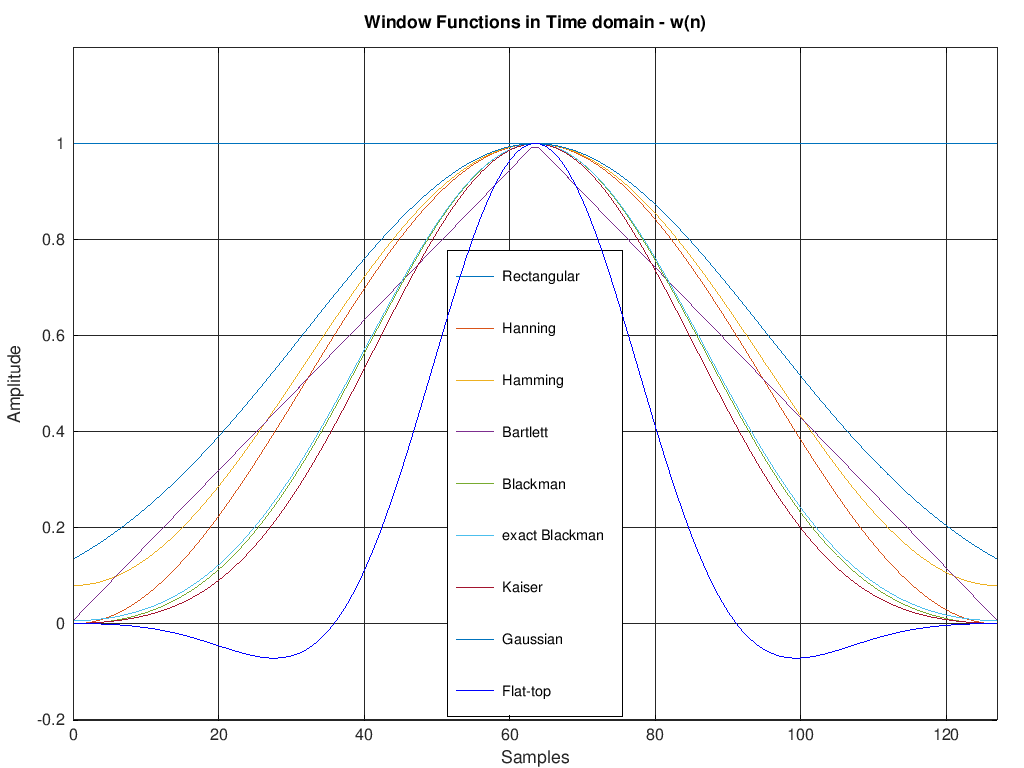

In [78]:
fig=1
figure(fig++);
size(w_rec)
handle=plot(n,[w_rec;w_hann;w_hamming;w_bartlett;w_blackman;w_eblackman;w_kaiser;w_gaussian]);
set(handle,'linewidth',1.5);
hold on;
handle=plot(n,[w_flattop],'b-');
set(handle,'linewidth',1.5);
axis([0 nos-1 -0.2 1.2]);
grid on;
legend({'Rectangular','Hanning','Hamming','Bartlett','Blackman','exact Blackman','Kaiser','Gaussian','Flat-top'},"location","south");
title('Window Functions in Time domain - w(n)');
xlabel('Samples');
ylabel('Amplitude');
%plot2svg

<div class="pagebreak"></div>

### Frequency Response of Window Function

ans =

   512     1



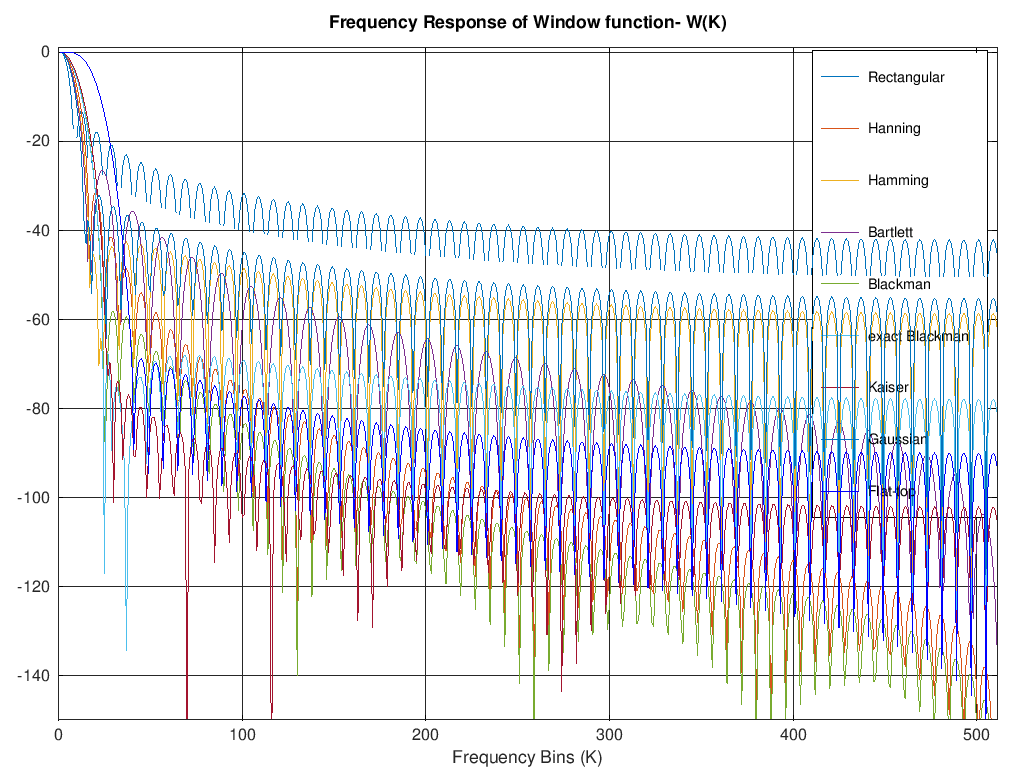

In [79]:
figure(fig++);
size(W_REC)
handle=plot(20*log10(abs(([W_REC W_HANN W_HAMMING W_BARTLETT W_BLACKMAN W_EBLACKMAN W_KAISER W_GAUSSIAN]))));
set(handle,'linewidth',1.5);hold on;
handle=plot(20*log10(abs(([W_FLATTOP]))),'b-');
set(handle,'linewidth',1.5);
axis([0 length(W_REC)-1 -150 1]);
grid on;
legend({'Rectangular','Hanning','Hamming','Bartlett','Blackman','exact Blackman','Kaiser','Gaussian','Flat-top'},"location","northeast");
title('Frequency Response of Window function- W(K)');
xlabel('Frequency Bins (K)');%ylabel('Magnitude');

<div class="pagebreak"></div>

### Nice List of Windows

#### Rectangular

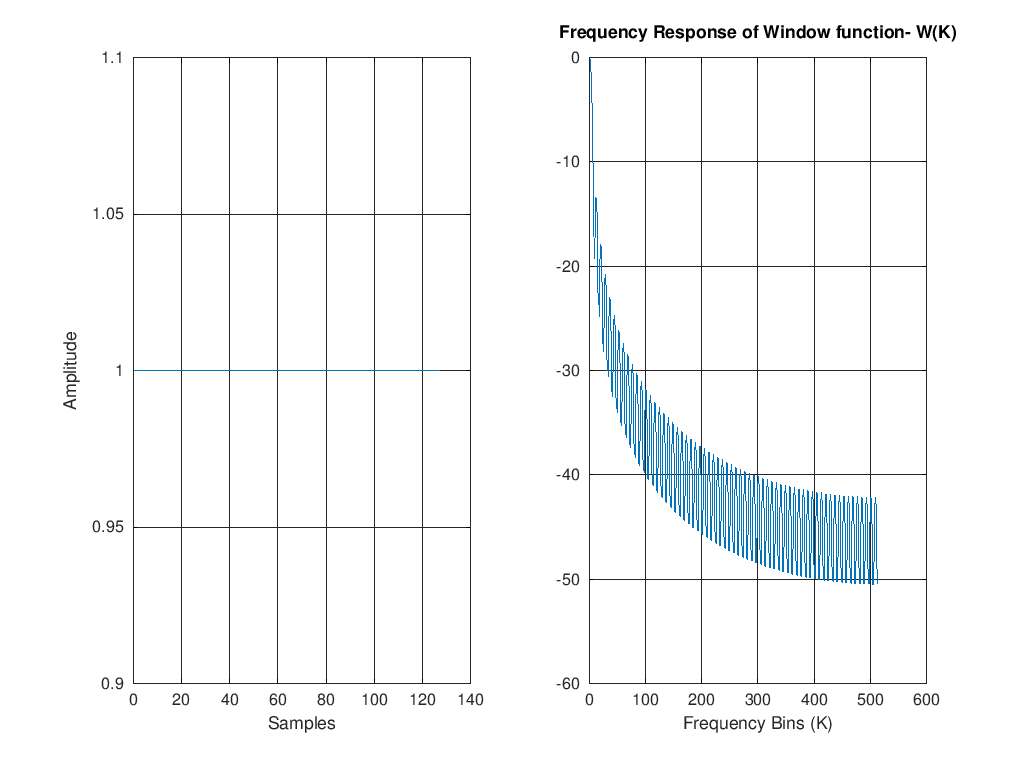

In [80]:
figure(fig++);
subplot (1, 2, 1)
handle=plot(n,w_rec);
xlabel('Samples');
ylabel('Amplitude');
grid on;
subplot (1, 2, 2)
handle=plot(20.*log10(abs(W_REC)));
set(handle,'linewidth',1.5);
#axis([0 length(W_REC)-1 -150 1]);
grid on;
title('Frequency Response of Window function- W(K)');
xlabel('Frequency Bins (K)');%ylabel('Magnitude');

#### Hanning

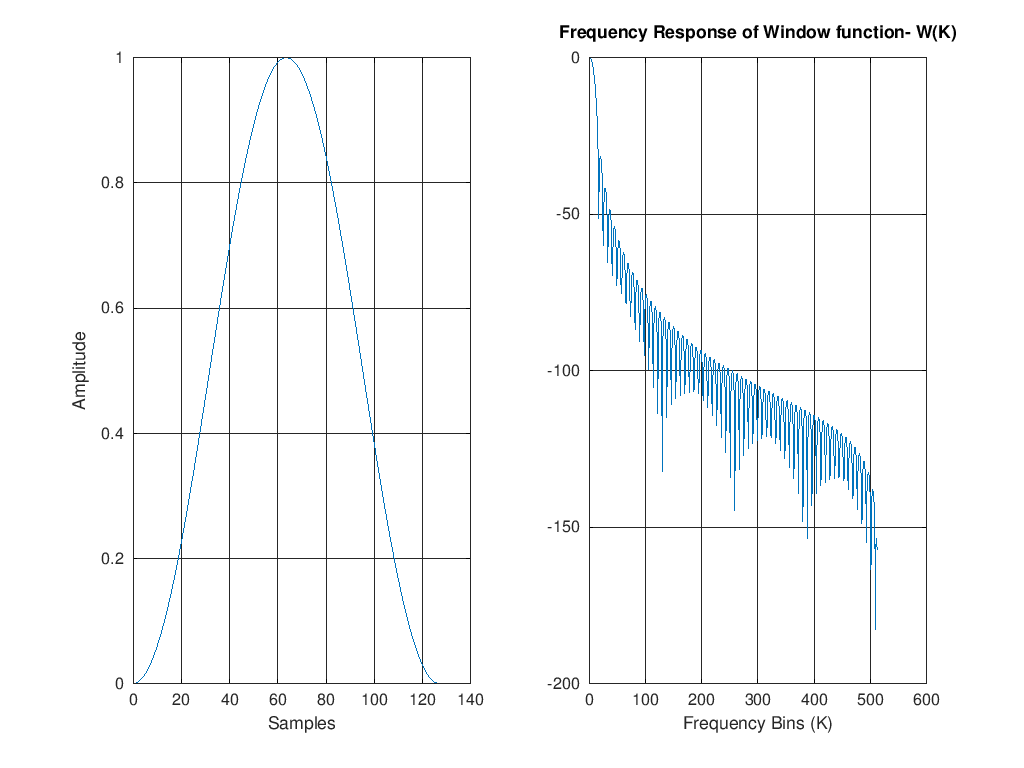

In [81]:
figure(fig++);
subplot (1, 2, 1)
handle=plot(n,w_hann);
xlabel('Samples');
ylabel('Amplitude');
grid on;
subplot (1, 2, 2)
handle=plot(20.*log10(abs(W_HANN)));
set(handle,'linewidth',1.5);
#axis([0 length(W_REC)-1 -150 1]);
grid on;
title('Frequency Response of Window function- W(K)');
xlabel('Frequency Bins (K)');%ylabel('Magnitude');

#### Hamming

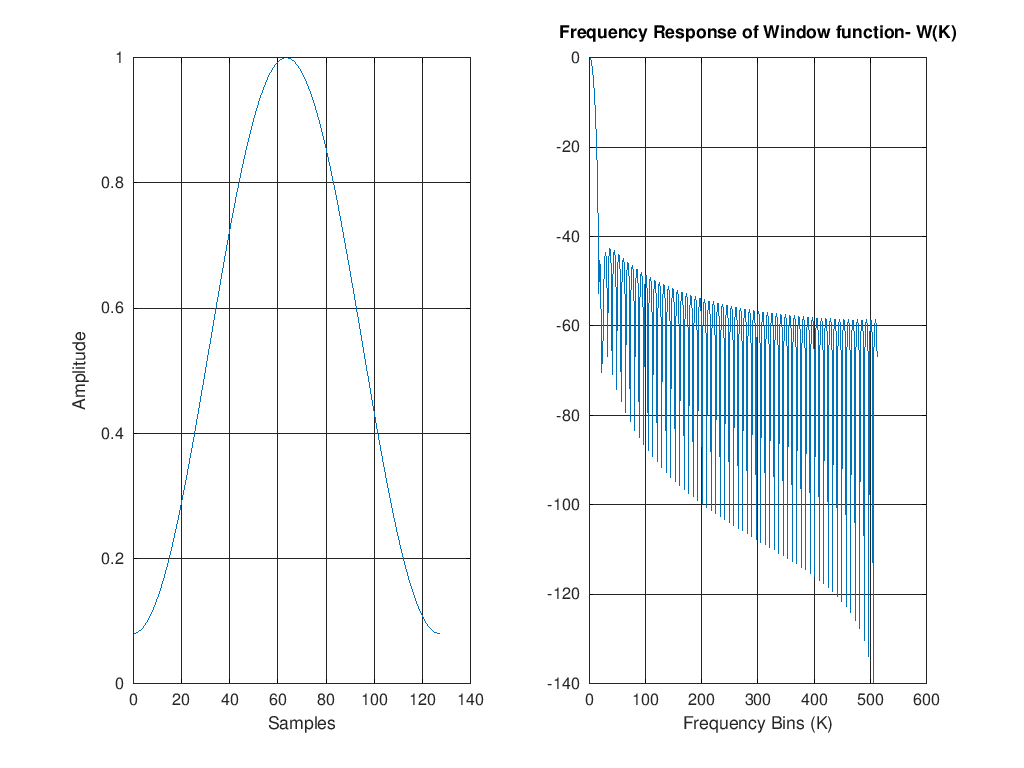

In [82]:
figure(fig++);
subplot (1, 2, 1)
handle=plot(n,w_hamming);
xlabel('Samples');
ylabel('Amplitude');
grid on;
subplot (1, 2, 2)
handle=plot(20.*log10(abs(W_HAMMING)));
set(handle,'linewidth',1.5);
#axis([0 length(W_REC)-1 -150 1]);
grid on;
title('Frequency Response of Window function- W(K)');
xlabel('Frequency Bins (K)');%ylabel('Magnitude');

#### Bartlett

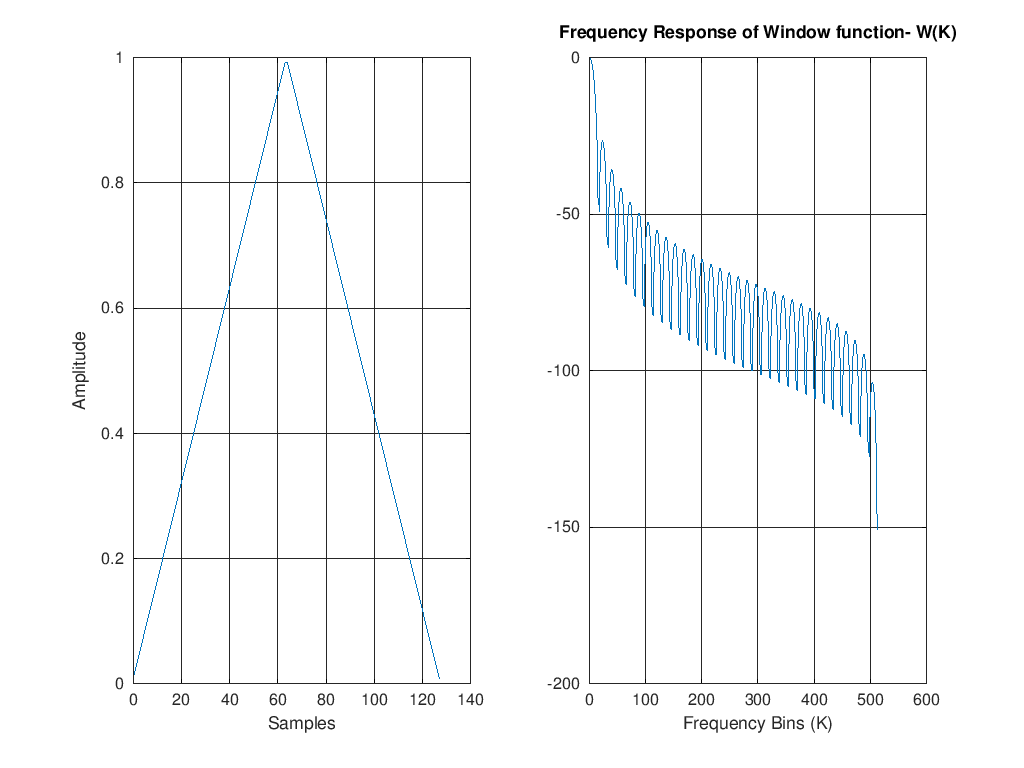

In [83]:
figure(fig++);
subplot (1, 2, 1)
handle=plot(n,w_bartlett);
xlabel('Samples');
ylabel('Amplitude');
grid on;
subplot (1, 2, 2)
handle=plot(20.*log10(abs(W_BARTLETT)));
set(handle,'linewidth',1.5);
#axis([0 length(W_REC)-1 -150 1]);
grid on;
title('Frequency Response of Window function- W(K)');
xlabel('Frequency Bins (K)');%ylabel('Magnitude');

#### Blackman

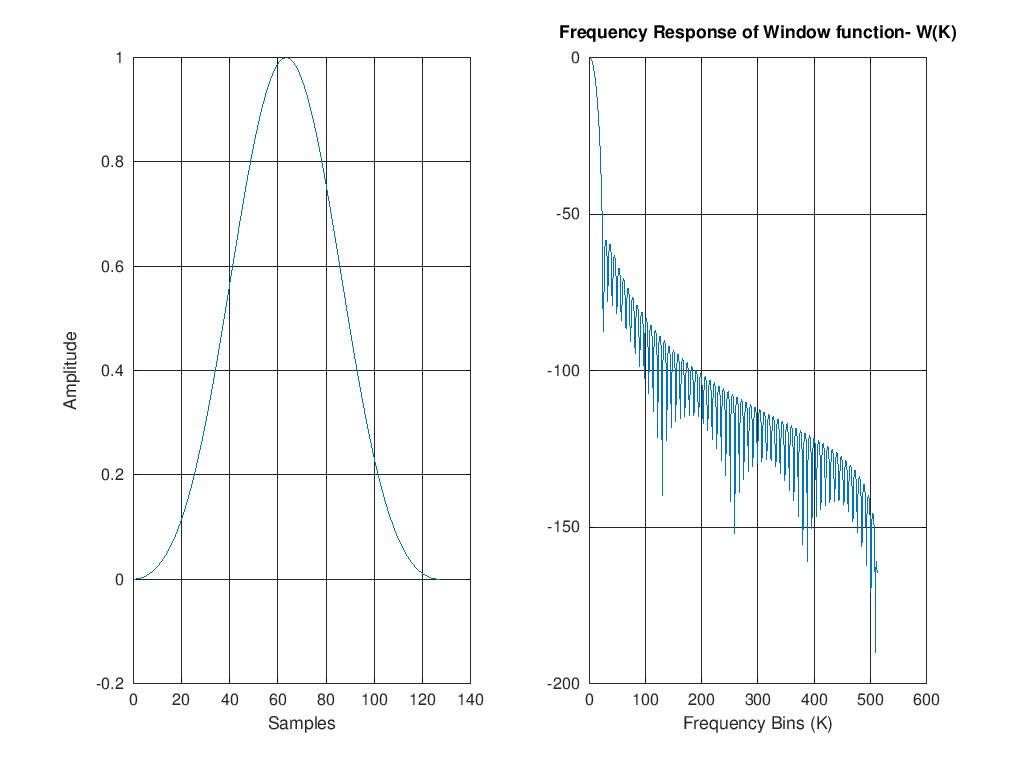

In [84]:
figure(fig++);
subplot (1, 2, 1)
handle=plot(n,w_blackman);
xlabel('Samples');
ylabel('Amplitude');
grid on;
subplot (1, 2, 2)
handle=plot(20.*log10(abs(W_BLACKMAN)));
set(handle,'linewidth',1.5);
#axis([0 length(W_REC)-1 -150 1]);
grid on;
title('Frequency Response of Window function- W(K)');
xlabel('Frequency Bins (K)');%ylabel('Magnitude');

#### Exact Blackman

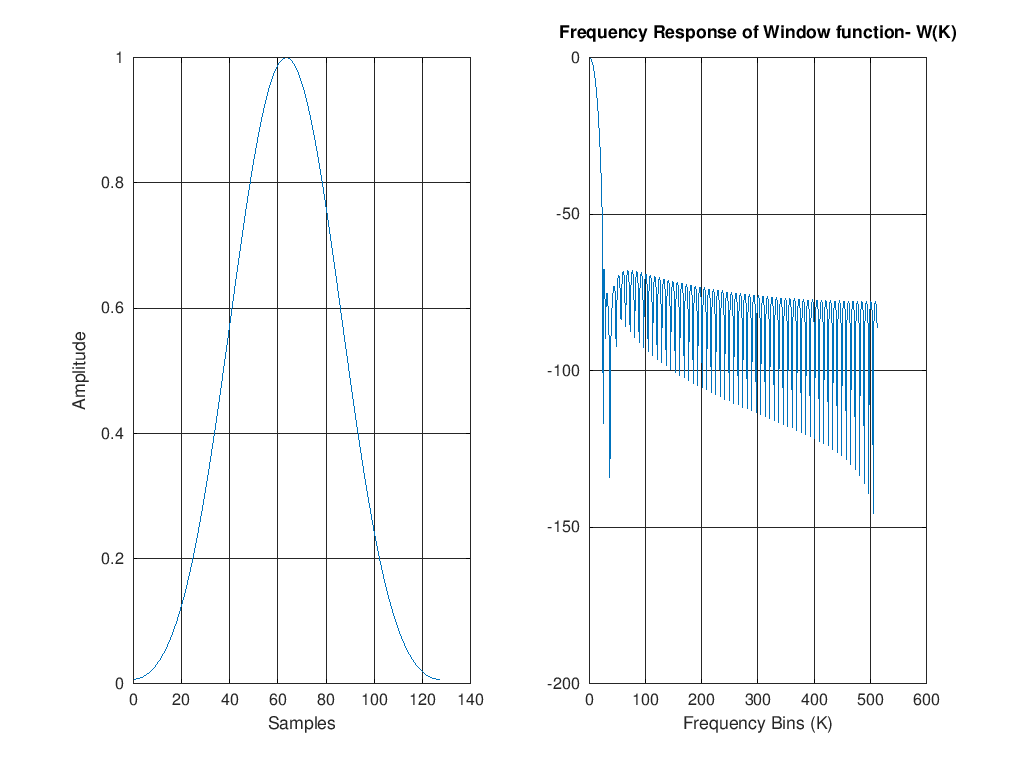

In [85]:
figure(fig++);
subplot (1, 2, 1)
handle=plot(n,w_eblackman);
xlabel('Samples');
ylabel('Amplitude');
grid on;
subplot (1, 2, 2)
handle=plot(20.*log10(abs(W_EBLACKMAN)));
set(handle,'linewidth',1.5);
#axis([0 length(W_REC)-1 -150 1]);
grid on;
title('Frequency Response of Window function- W(K)');
xlabel('Frequency Bins (K)');%ylabel('Magnitude');

#### Kaiser

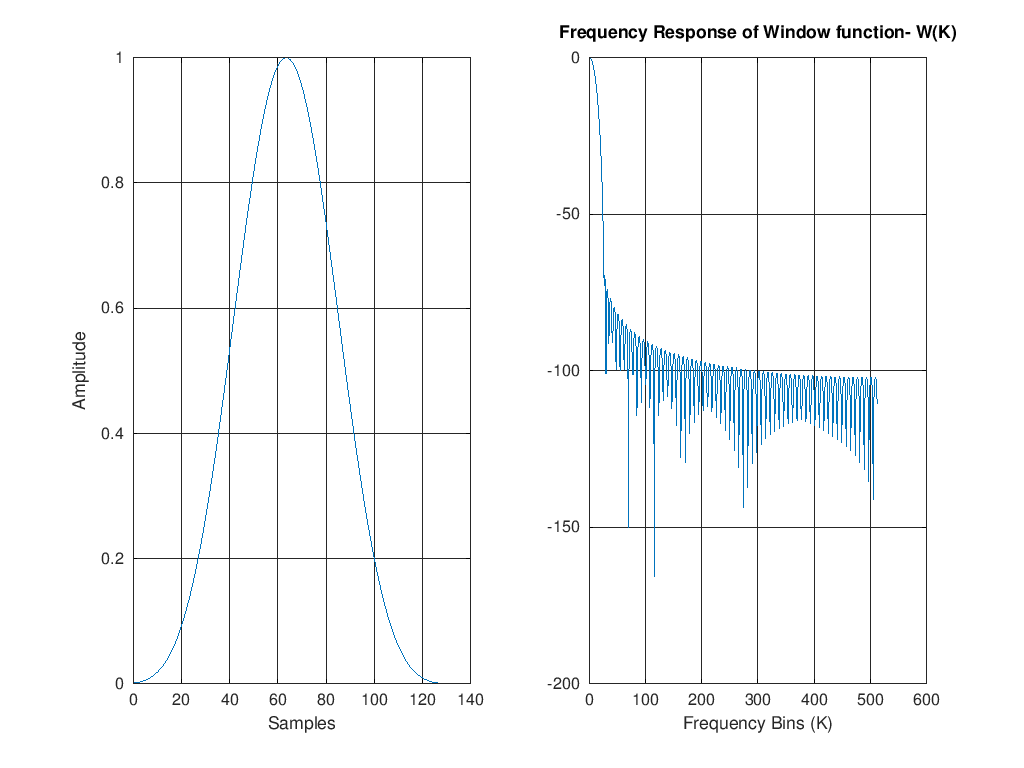

In [86]:
figure(fig++);
subplot (1, 2, 1)
handle=plot(n,w_kaiser);
xlabel('Samples');
ylabel('Amplitude');
grid on;
subplot (1, 2, 2)
handle=plot(20.*log10(abs(W_KAISER)));
set(handle,'linewidth',1.5);
#axis([0 length(W_REC)-1 -150 1]);
grid on;
title('Frequency Response of Window function- W(K)');
xlabel('Frequency Bins (K)');%ylabel('Magnitude');

#### Gaussian

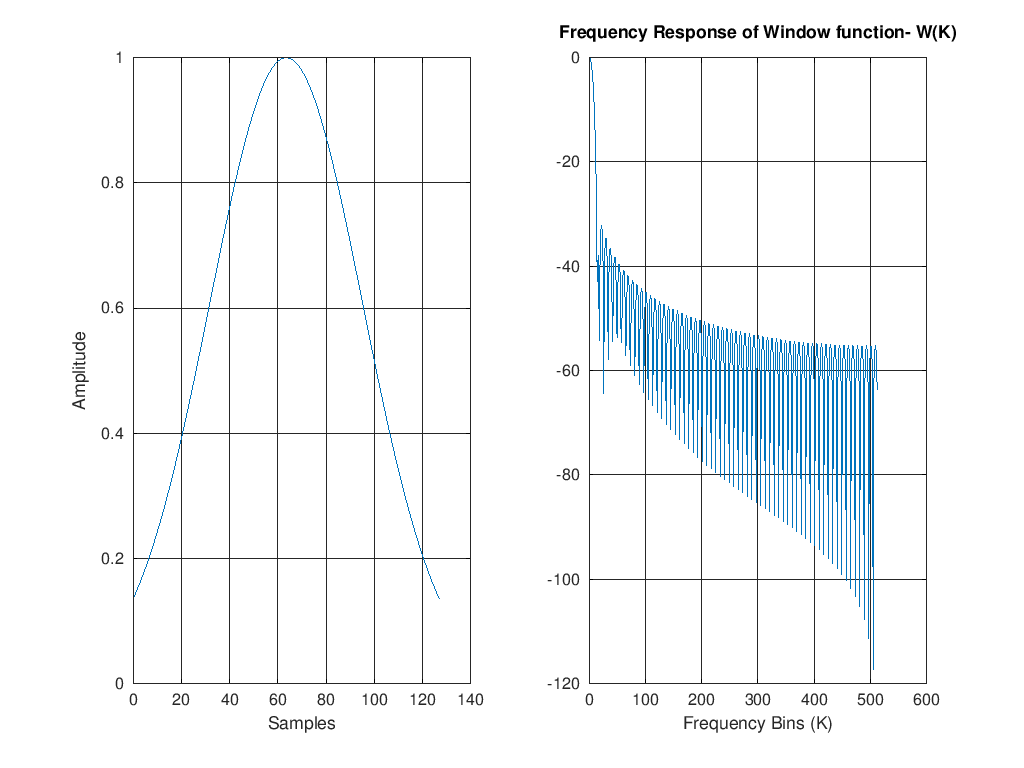

In [87]:
figure(fig++);
subplot (1, 2, 1)
handle=plot(n,w_gaussian);
xlabel('Samples');
ylabel('Amplitude');
grid on;
subplot (1, 2, 2)
handle=plot(20.*log10(abs(W_GAUSSIAN)));
set(handle,'linewidth',1.5);
#axis([0 length(W_REC)-1 -150 1]);
grid on;
title('Frequency Response of Window function- W(K)');
xlabel('Frequency Bins (K)');%ylabel('Magnitude');

## Coherent Gain (CG)

Coherent Gain = Mean of Window

$$CG=\frac{1}{N} \sum_{k=0}^{N-1} a(k)$$

In [88]:
%%file CoherentGain.m

function result=CoherentGain(wnd,nos)
  result=1./nos.*sum(wnd);
endfunction

Created file '/home/danny/Dokumente/Jupyter_Notebooks/octave/CoherentGain.m'.


In [89]:
CG_Rectangular=CoherentGain(w_rec,nos)

CG_Hanning=CoherentGain(w_hann,nos)

CG_Hamming=CoherentGain(w_hamming,nos)

CG_Bartlett=CoherentGain(w_bartlett,nos)

CG_Blackman=CoherentGain(w_blackman,nos)

CG_EBlackman=CoherentGain(w_eblackman,nos)

CG_Kaiser=CoherentGain(w_kaiser,nos)

CG_Gaussian=CoherentGain(w_gaussian,nos)

CG_Flattop=CoherentGain(w_flattop,nos)

CG_Rectangular =  1
CG_Hanning =  0.49609
CG_Hamming =  0.53641
CG_Bartlett =  0.50000
CG_Blackman =  0.41672
CG_EBlackman =  0.42331
CG_Kaiser =  0.39941
CG_Gaussian =  0.59452
CG_Flattop =  0.21400


##  Coherent Power Gain (CPG)

Is a meassure for the amplitude loss in the frequency domain. To correct the FFT output we need to offset (additive) by the CPG in order to compensate the loss.

$$CPG=\left(\frac{1}{N} \sum_{k=0}^{N-1} a(k)\right)^2$$

In [90]:
%%file CoherentPowerGain.m

function result=CoherentPowerGain(wnd,nos)
  result=(1./nos.*sum(wnd)).^2;
endfunction

Created file '/home/danny/Dokumente/Jupyter_Notebooks/octave/CoherentPowerGain.m'.


In [91]:
CG_Rectangular=CoherentPowerGain(w_rec,nos)
10.*log10(CG_Rectangular)

CG_Hanning=CoherentPowerGain(w_hann,nos)
10.*log10(CG_Hanning)

CG_Hamming=CoherentPowerGain(w_hamming,nos)
10.*log10(CG_Hamming)

CG_Bartlett=CoherentPowerGain(w_bartlett,nos)
10.*log10(CG_Bartlett)

CG_Blackman=CoherentPowerGain(w_blackman,nos)
10.*log10(CG_Blackman)

CG_EBlackman=CoherentPowerGain(w_eblackman,nos)
10.*log10(CG_EBlackman)

CG_Kaiser=CoherentPowerGain(w_kaiser,nos)
10.*log10(CG_Kaiser)

CG_Gaussian=CoherentPowerGain(w_gaussian,nos)
10.*log10(CG_Gaussian)

CG_Flattop=CoherentPowerGain(w_flattop,nos)
10.*log10(CG_Flattop)

CG_Rectangular =  1
ans = 0
CG_Hanning =  0.24611
ans = -6.0887
CG_Hamming =  0.28773
ans = -5.4101
CG_Bartlett =  0.25000
ans = -6.0206
CG_Blackman =  0.17365
ans = -7.6031
CG_EBlackman =  0.17919
ans = -7.4668
CG_Kaiser =  0.15953
ans = -7.9717
CG_Gaussian =  0.35345
ans = -4.5167
CG_Flattop =  0.045795
ans = -13.392


<div class="pagebreak"></div>

## Equivalent Noise Bandwidth (ENBW)

$$ENBW=\frac{\frac{1}{N} \sum_{k=0}^{N-1} a(k)^2}{\left(\frac{1}{N} \sum_{k=0}^{N-1} a(k)\right)^2}$$

In [92]:
%%file ENBW.m

function result=ENBW(wnd,nos)
  result=CoherentGain((wnd.^2),nos)./CoherentPowerGain(wnd,nos);
endfunction

Created file '/home/danny/Dokumente/Jupyter_Notebooks/octave/ENBW.m'.


In [93]:
ENBW_Rectangular=ENBW(w_rec,nos)

ENBW_Hanning=ENBW(w_hann,nos)

ENBW_Hamming=ENBW(w_hamming,nos)

ENBW_Bartlett=ENBW(w_bartlett,nos)

ENBW_Blackman=ENBW(w_blackman,nos)

ENBW_Kaiser=ENBW(w_kaiser,nos)

ENBW_Gaussian=ENBW(w_gaussian,nos)

ENBW_Flattop=ENBW(w_flattop,nos)

ENBW_Rectangular =  1
ENBW_Hanning =  1.5118
ENBW_Hamming =  1.3705
ENBW_Bartlett =  1.3333
ENBW_Blackman =  1.7404
ENBW_Kaiser =  1.8093
ENBW_Gaussian =  1.2385
ENBW_Flattop =  3.7997


## Scalloping loss

* Frequency exactly in the middle of a bin: max. Amplitude
* Frequency exactly at border (between 2 adjacent bins) of a bin: min. Amplitude according to window function --> Scalloping loss

## Other functions to try
Bartlett-Hann Window

In [94]:
a0=0.62;a1=0.48;a2=0.38;
w_bartlett_hann=a0-a1*abs(n/(nos-1) - 1/2)-a2*cos(2*pi*n/(nos-1));
W_BARTLETT_HANN=freqz(w_bartlett_hann,1,f);
W_BARTLETT_HANN=W_BARTLETT_HANN/(max(abs(W_BARTLETT_HANN)));

In [95]:
sig=sin(2.*pi().*50.*(0:1./(nos-1):1));

ans =

  -16.991  -25.945



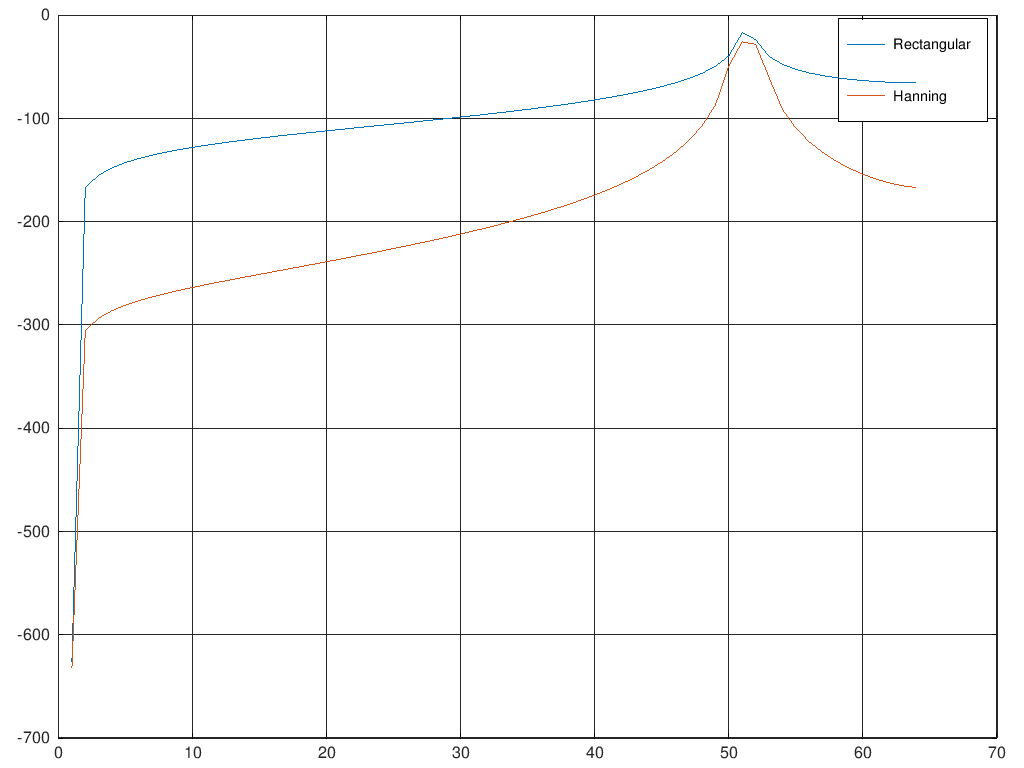

In [96]:
figure(fig++);
wsig_Rectangular=sig;
tmp=((fft(wsig_Rectangular).^2)./(nos.^2))(:,1:1:(nos./2));
S_REC=20.*log10(abs(tmp));
handle=plot(S_REC);
set(handle,'linewidth',1.0);hold on;
wsig_Hanning=sig.*w_hann;
tmp=((fft(wsig_Hanning).^2)./(nos.^2))(:,1:1:(nos./2));
S_HANN=20.*log10(abs(tmp));
handle=plot(S_HANN);
set(handle,'linewidth',1.0);grid on;
legend({'Rectangular','Hanning'},"location","northeast");

[max(S_REC) max(S_HANN)]